## TOIs with CDIPS lc in sector 6

In [1]:
from chronos import CDIPS
from chronos.utils import query_gaia_params_of_all_tois
from chronos.cdips import get_url_in_cdips_inventory
from tqdm import tqdm

#downloaded gaia query for all TOIs
df = query_gaia_params_of_all_tois(fp='../data/toi_gaia_params.hdf5')
df.shape

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Loaded: ../data/toi_gaia_params.hdf5


(910, 95)

In [8]:
cdips_urls_sector6 = {}

for toi in tqdm(df.index):
    try:
        gaiaid = df.loc[toi,'source_id']
        urls = get_url_in_cdips_inventory(gaiaid=gaiaid, sector=6, verbose=False)
        if len(urls)>0:
            cdips_urls_sector6[toi] = urls
    except:
        pass

100%|██████████| 910/910 [05:16<00:00,  2.88it/s]


In [10]:
cdips_urls_sector6.keys()

dict_keys([450, 476, 520, 527, 588, 642, 882, 886, 893, 1014])

In [11]:
sector = 6

toi_with_cdips_lc_sector6 = {}
for toi in tqdm(list(cdips_urls_sector6.keys())):
    try:
        gaiaid = df.loc[toi,'source_id']
        urls = get_url_in_cdips_inventory(gaiaid=gaiaid, verbose=False, clobber=False, sector=sector)
        cdips = CDIPS(gaiaDR2id=gaiaid, sector=sector, aper_idx=1, lctype='flux', verbose=False)
        lc = cdips.lc
        lc.label = f'TOI {toi}.01'
        toi_with_cdips_lc_sector6[toi] = lc
    except Exception as e:
        print(e)

100%|██████████| 10/10 [00:58<00:00,  5.84s/it]


In [12]:
toi_with_cdips_lc_sector6

{450: TessLightCurve(TICID: None),
 476: TessLightCurve(TICID: None),
 520: TessLightCurve(TICID: None),
 527: TessLightCurve(TICID: None),
 588: TessLightCurve(TICID: None),
 642: TessLightCurve(TICID: None),
 882: TessLightCurve(TICID: None),
 886: TessLightCurve(TICID: None),
 893: TessLightCurve(TICID: None),
 1014: TessLightCurve(TICID: None)}

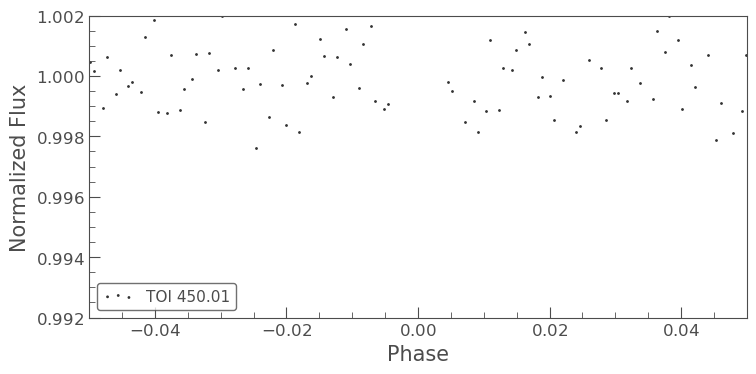

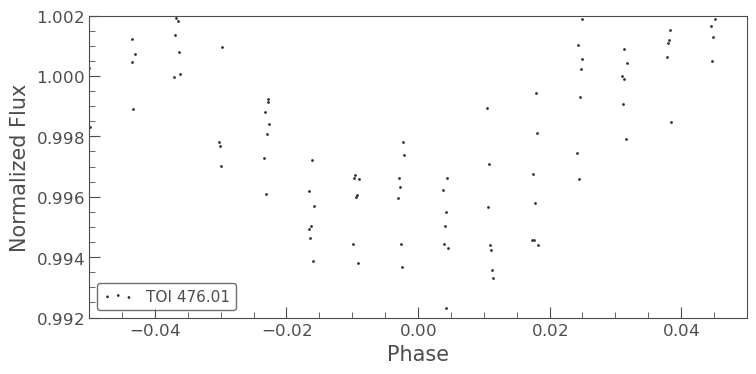

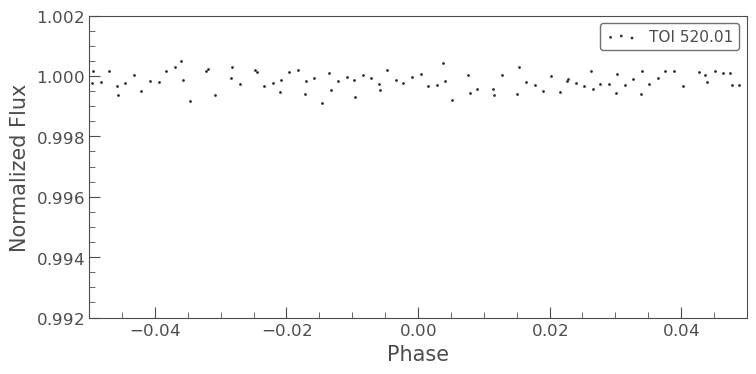

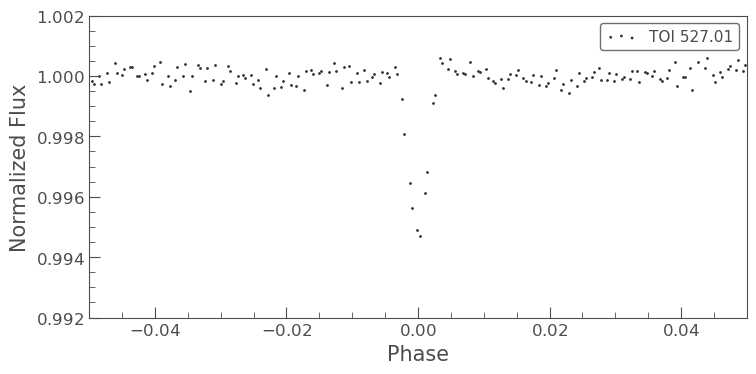

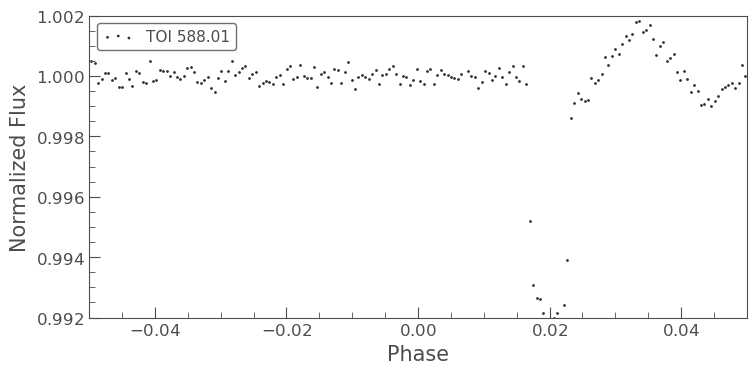

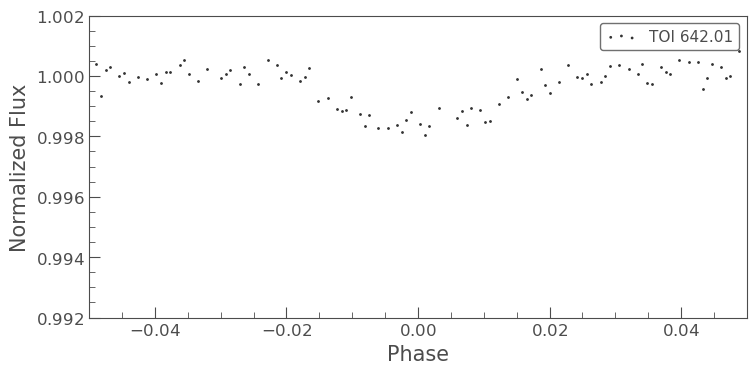

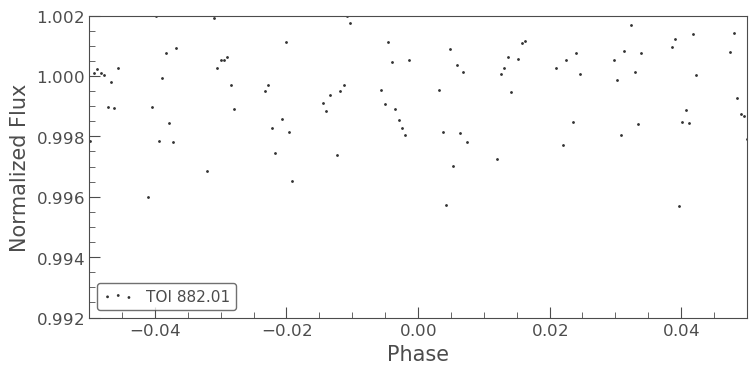

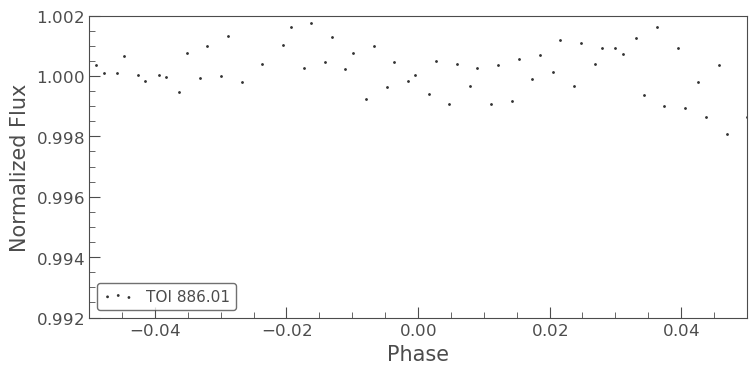

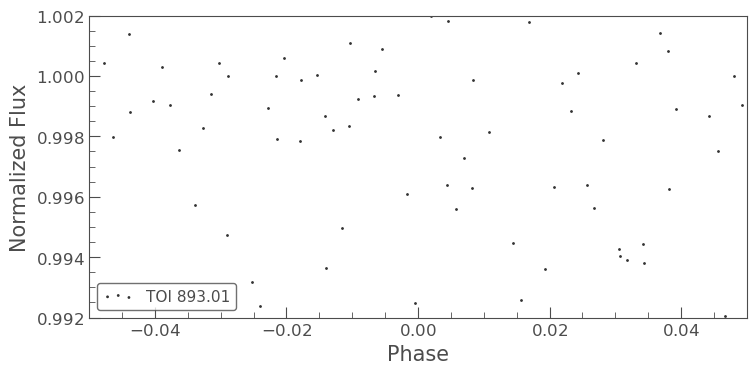

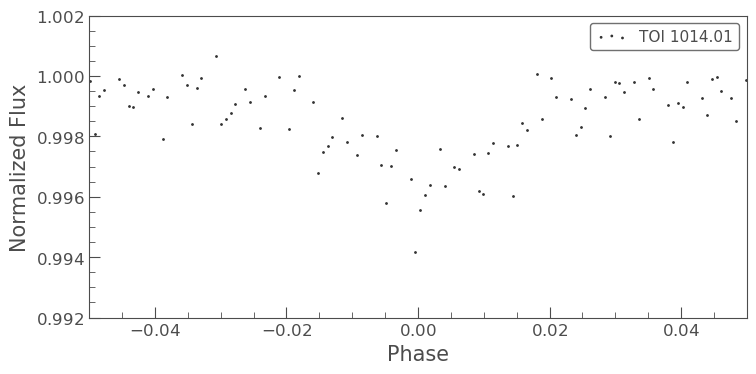

In [22]:
from chronos.utils import get_toi

for toi in tqdm(toi_with_cdips_lc_sector6):
    lc = toi_with_cdips_lc_sector6[toi]
    #add toi label
    lc.label = f'TOI {toi}.01'
    #get ephemeris from TOI release (https://tev.mit.edu/data/)
    d = get_toi(toi=f'{toi}.01', verbose=False)
    per, t0, dur = d[['Period (days)', 'Epoch (BJD)', 'Duration (hours)']].values[0]
    #plot
    ax = lc.remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter()
    ax.set_xlim([-dur/24/2,dur/24/2])
    ax.set_ylim([0.992,1.002])

## TOIs with CDIPS light curves in sector 7

In [6]:
cdips_urls_sector7 = {}

for toi in tqdm(df.index):
    try:
        gaiaid = df.loc[toi,'source_id']
        urls = get_url_in_cdips_inventory(gaiaid=gaiaid, sector=7, verbose=False)
        if len(urls)>0:
            cdips_urls_sector7[toi] = urls
    except:
        pass

100%|██████████| 910/910 [05:15<00:00,  2.88it/s]


In [7]:
cdips_urls_sector7.keys()

dict_keys([476, 503, 504, 508, 520, 522, 527, 583, 586, 612, 625, 626, 631, 642, 681, 692, 986, 990, 993, 996, 998, 1000, 1001, 1004, 1010, 1012, 1014, 1019])

In [10]:
sector = 7

toi_with_cdips_lc_sector7 = {}
for toi in tqdm(list(cdips_urls_sector7.keys())):
    try:
        gaiaid = df.loc[toi,'source_id']
        urls = get_url_in_cdips_inventory(gaiaid=gaiaid, verbose=False, clobber=False, sector=sector)
        cdips = CDIPS(gaiaDR2id=gaiaid, sector=sector, aper_idx=1, lctype='flux', verbose=False)
        lc = cdips.lc
        lc.label = f'TOI {toi}.01'
        toi_with_cdips_lc_sector7[toi] = lc
    except Exception as e:
        print(e)

  7%|▋         | 2/28 [00:08<01:32,  3.57s/it]

File not found:
https://archive.stsci.edu/hlsps/cdips/s0007/cam1_ccd3/hlsp_cdips_tess_ffi_gaiatwo000650254479499119232-0007-cam1-ccd3_tess_v01_llc.fits
CDIPS lc is currently available for sectors=[6, 7]
The first observed sector (7) was used by default.



100%|██████████| 28/28 [01:47<00:00,  3.83s/it]


In [12]:
toi_with_cdips_lc_sector7.keys()

dict_keys([476, 504, 508, 520, 522, 527, 583, 586, 612, 625, 626, 631, 642, 681, 692, 986, 990, 993, 996, 998, 1000, 1001, 1004, 1010, 1012, 1014, 1019])

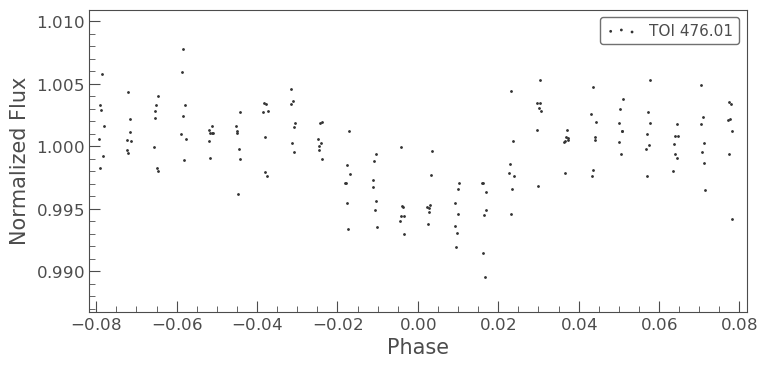

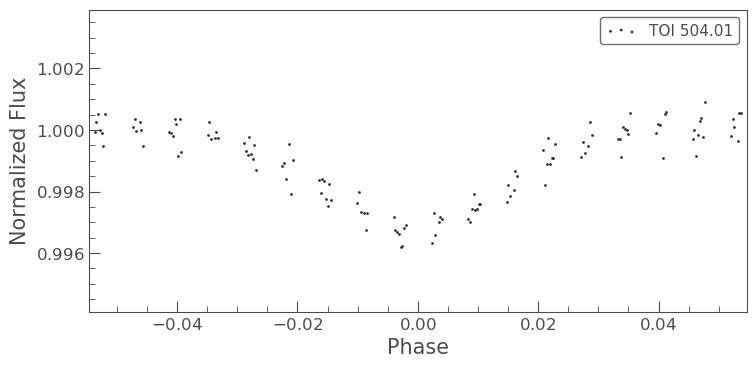

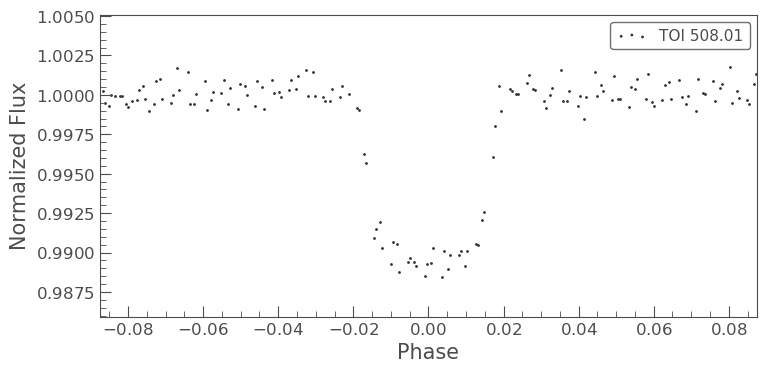

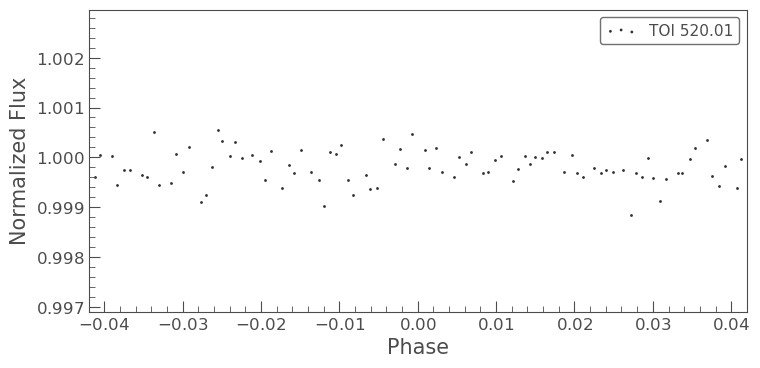

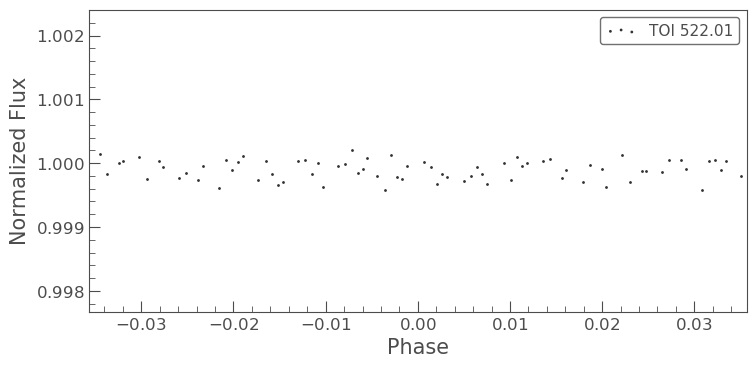

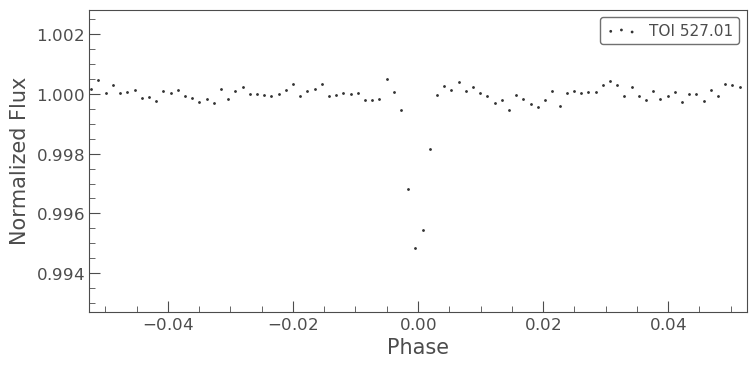

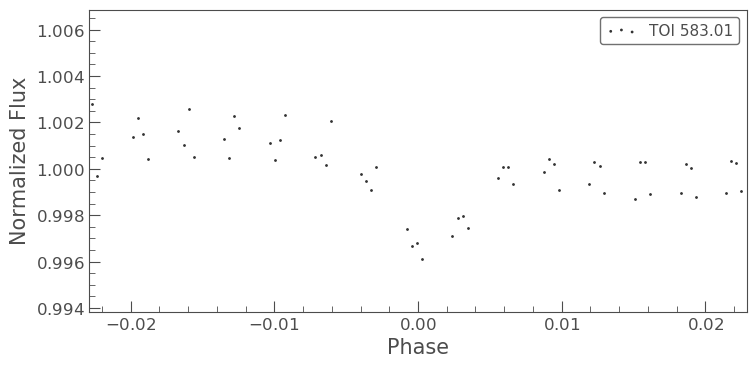

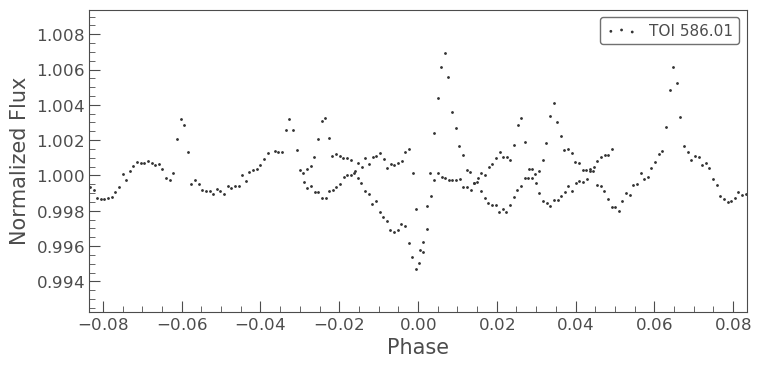

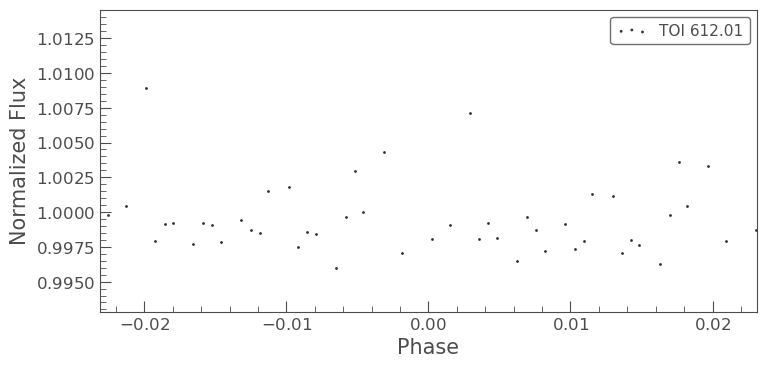

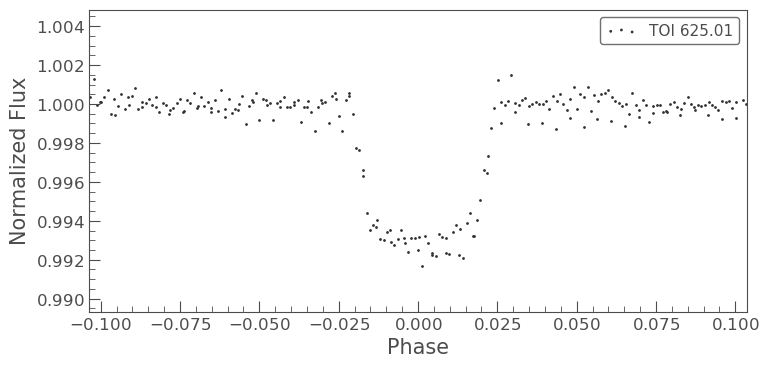

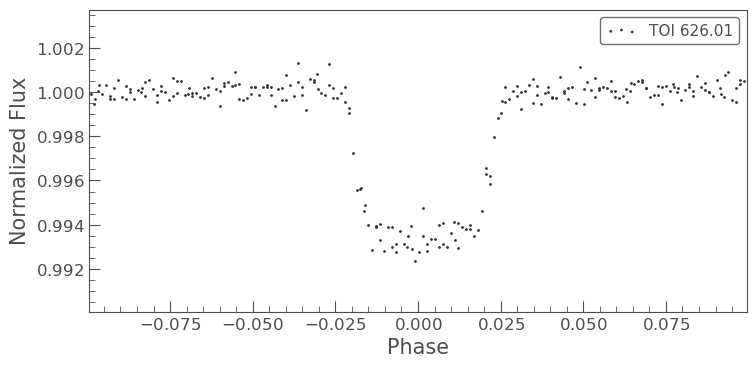

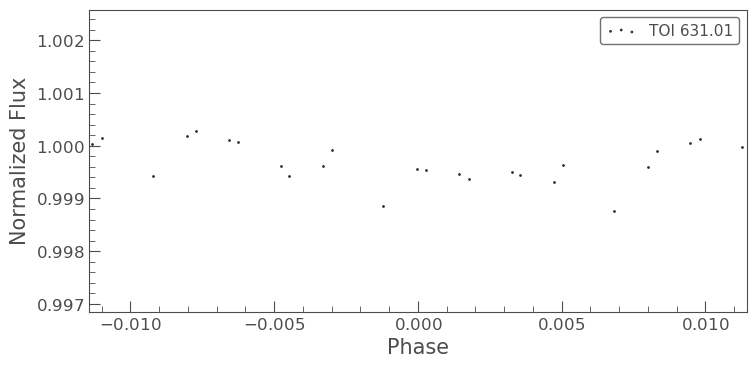

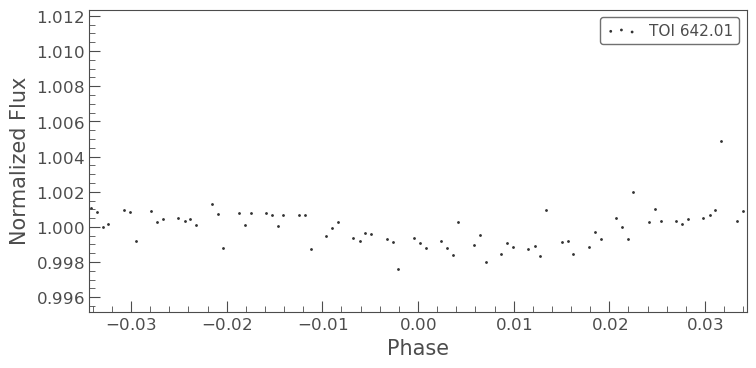

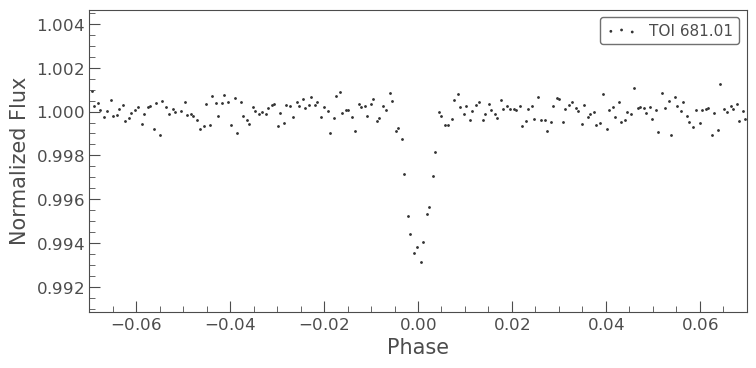

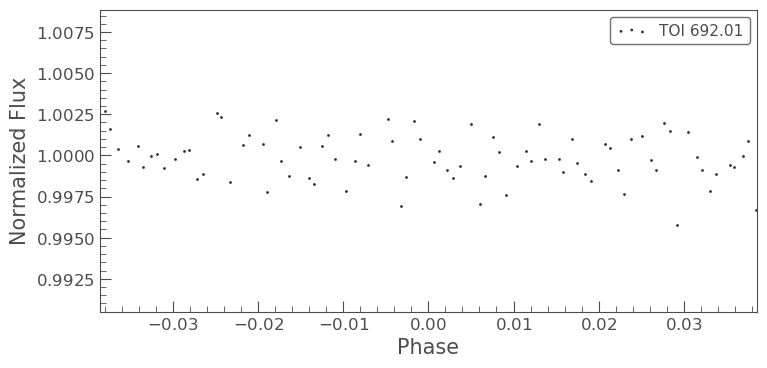

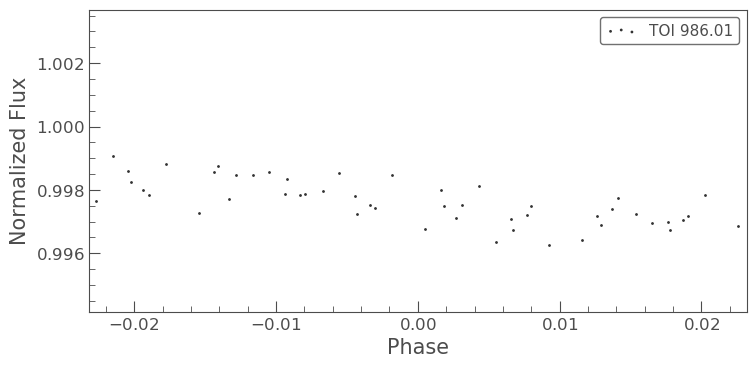

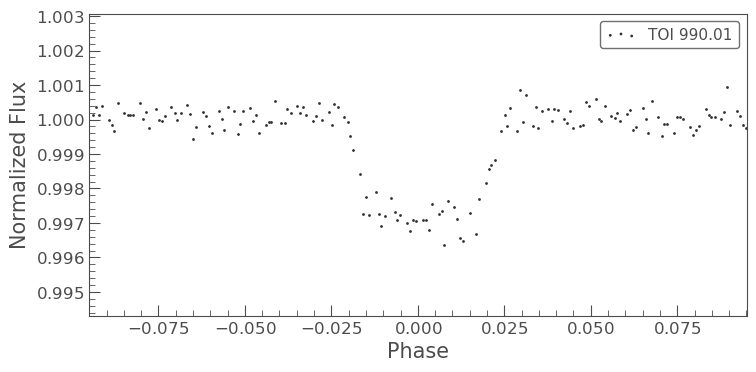

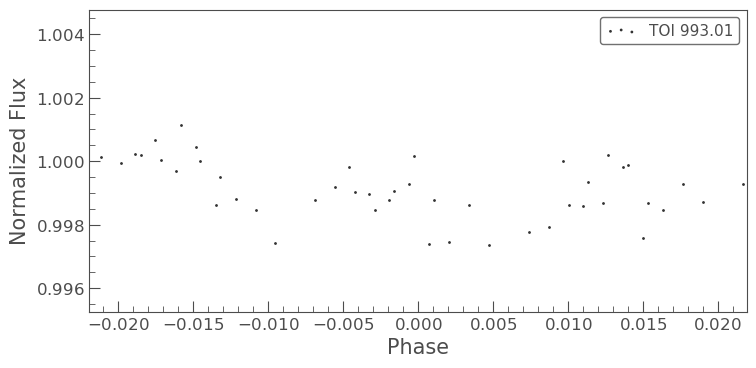

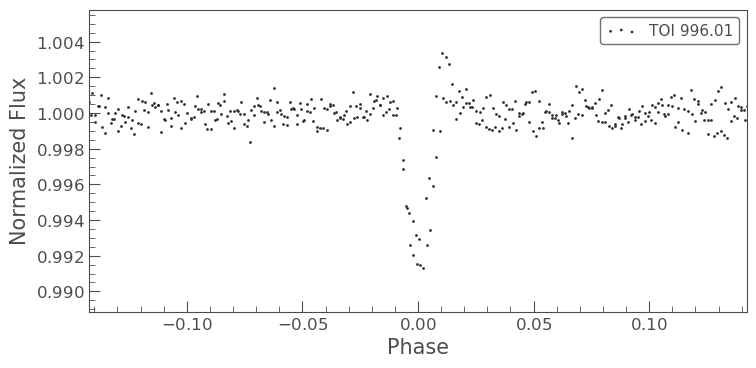

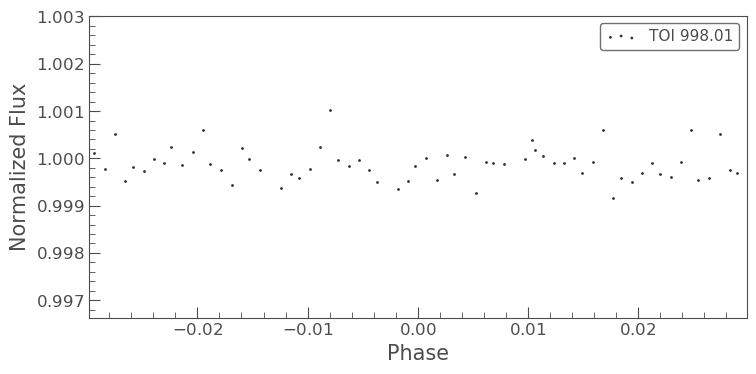

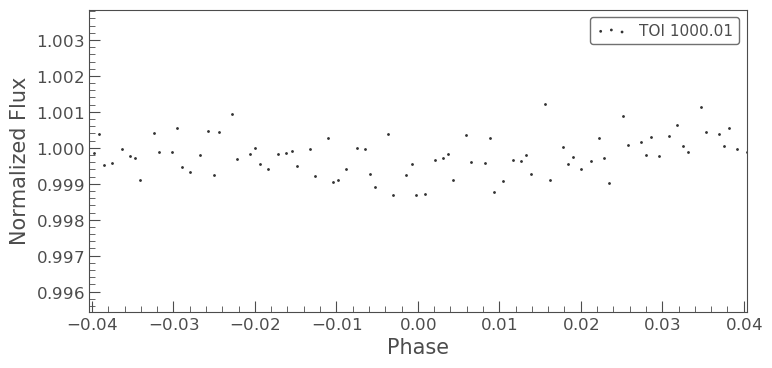

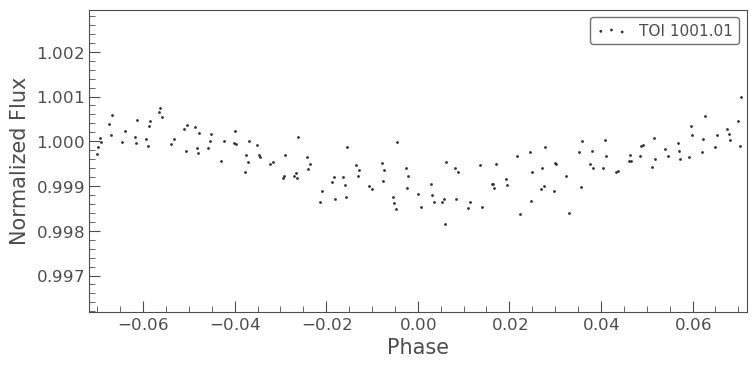

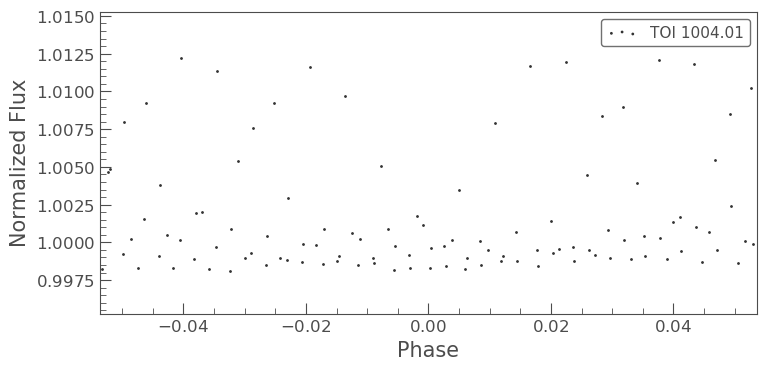

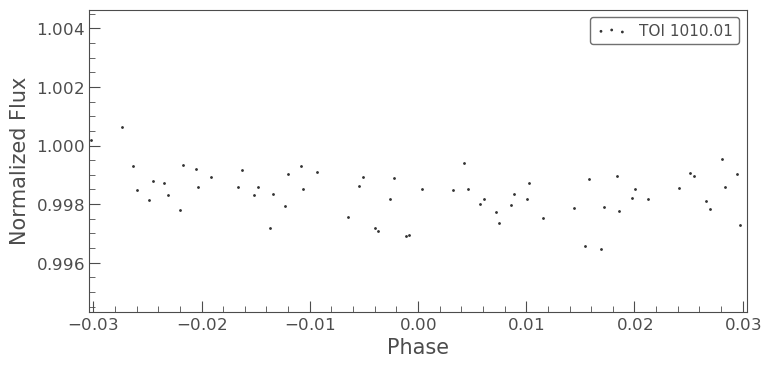

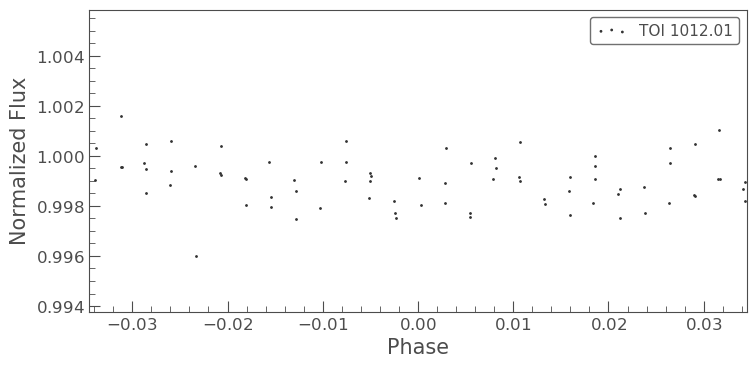

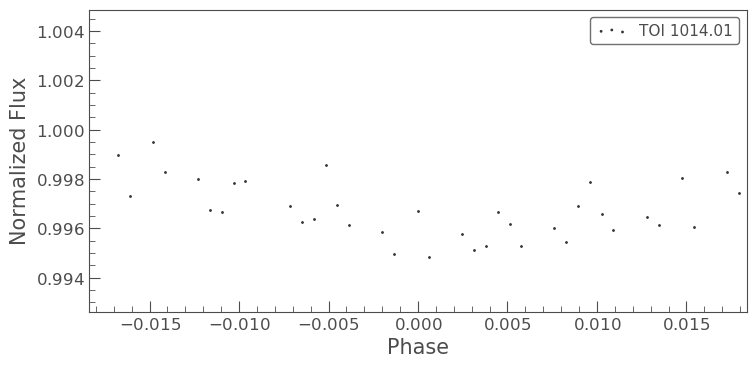

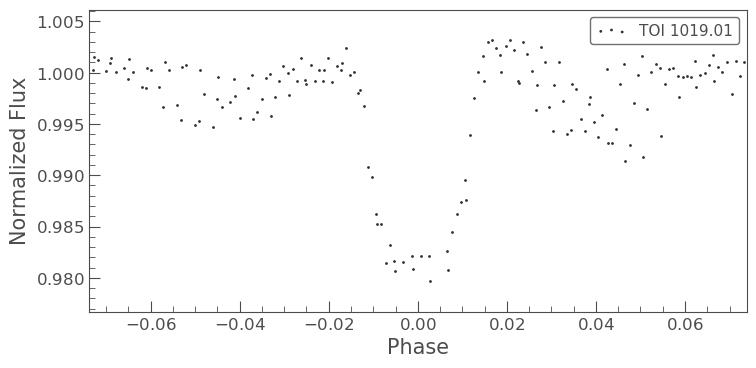

In [14]:
from chronos.utils import get_toi

for toi in tqdm(toi_with_cdips_lc_sector7):
    lc = toi_with_cdips_lc_sector7[toi]
    #add toi label
    lc.label = f'TOI {toi}.01'
    #get ephemeris from TOI release (https://tev.mit.edu/data/)
    d = get_toi(toi=f'{toi}.01', verbose=False)
    per, t0, dur = d[['Period (days)', 'Epoch (BJD)', 'Duration (hours)']].values[0]
    #plot
    ax = lc.remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter()
    ax.set_xlim([-dur/24/2,dur/24/2])
#     ax.set_ylim([0.992,1.002])

## check if depth is consistent with TESS Releases

In [36]:
good = [504,508,624,625,681,990,996,1019]

In [39]:
for toi in toi_with_cdips_lc_sector7.keys():
    d = get_toi(toi=toi, clobber=False, verbose=False)
    print(toi,d['Comments'].values[0])

476 check timing of possible pulsations; giant planet or EB; GAIA Rstar=2.3Rsun
504 V-shaped;  d_rp=5 for neighbor 4-5
508 KELT-19A
520 possible NEB
522 V-shaped and short period; GAIA Rp=1.6 Rsun
527 GAIA Rstar=2.2Rsun; planet is likely larger than 16Re
583 nan
586 Period is likely double; V shaped
612 large planet; possibly grazing; need SG1 to check 284738170
625 likely hot Jupiter
626 nan
631 might be synchronized
642 crowded field; could be on 79292540
681 V-shaped; possible odd/even
692 low S/N transit
986 V shaped
990 ephemerides match to M dwarf 88684237 where Rp=7.9
993 nan
996 nan
998 marginal
1000 nan
1001 V-shaped
1004 nan
1010 nan
1012 nan
1014 Might be diluted; SG1 to check
1019 large


![img](/home/jp/github/research/project/tql/plots/sectors/sec6.png)

In [53]:
from transitleastsquares import transitleastsquares

toi = 626
lc = toi_with_cdips_lc_sector7[toi].remove_outliers().normalize()
t, f, e = lc.time, lc.flux, lc.flux_err
tls = transitleastsquares(t, f ,e)

In [54]:
res = tls.power()

  0%|          | 0/2182 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 27 durations
Searching 1086 data points, 2182 periods from 0.601 to 12.208 days
Using all 8 CPU threads


100%|██████████| 2182/2182 periods | 00:03<00:00 


In [55]:
res

{'SDE': 14.120023695214764,
 'SDE_raw': 12.593481042724848,
 'chi2_min': 0.002846212124592344,
 'chi2red_min': 2.630510281508636e-06,
 'period': 4.402892945761999,
 'period_uncertainty': 0.03348542052656711,
 'T0': 2458493.316315319,
 'duration': 0.19368408645699078,
 'depth': 0.9932622550976897,
 'depth_mean': (0.9943741223497129, 0.00029237480601446505),
 'depth_mean_even': (0.9932183525231173, 0.0002946848865488969),
 'depth_mean_odd': (0.9954886146825014, 0.0003983945456095378),
 'transit_depths': array([0.9936238 , 0.993855  , 0.99219327, 0.99756987, 0.99386476,
        0.99480972]),
 'transit_depths_uncertainties': array([0.00060475, 0.00039527, 0.00027958, 0.00056036, 0.00030513,
        0.00033142]),
 'rp_rs': 0.07381836620884691,
 'snr': 23.348434736796314,
 'snr_per_transit': array([11.28361877, 10.31642869, 13.10618945,  4.30046349,  9.71096432,
         8.71360731]),
 'snr_pink_per_transit': array([37.2765    , 35.92484061, 45.63960853, 14.20698718, 35.86774626,
        30.

In [56]:
res['period'], res['T0'], res['duration']

(4.402892945761999, 2458493.316315319, 0.19368408645699078)

In [57]:
d = get_toi(toi=toi, verbose=False, clobber=False)
d[['Period (days)', 'Epoch (BJD)', 'Duration (hours)']]

,Period (days),Epoch (BJD),Duration (hours)
626.01,4.40107,2.458493e+06,4.774


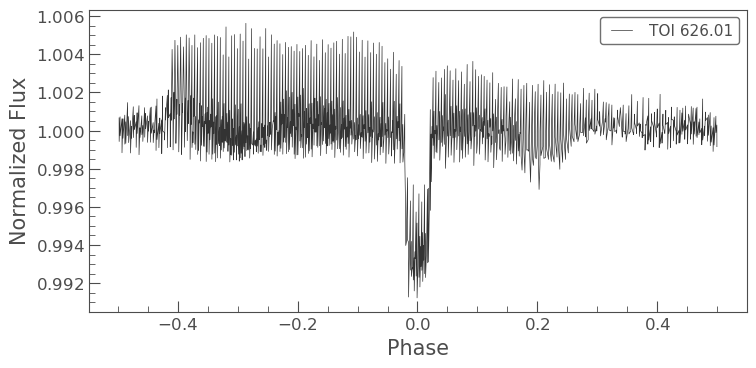

In [58]:
%matplotlib inline
import matplotlib.pyplot as pl

per, t0, dur = res['period'], res['T0'], res['duration']
lc.fold(t0=t0, period=per).plot()

In [64]:
import lightkurve as lk

# toi = 626
d = get_toi(toi=toi, verbose=False, clobber=False)
ticid = d['TIC ID'].values[0]
# res = lk.search_lightcurvefile(f'TIC {ticid}') #no tpf?
# res = lk.search_targetpixelfile(f'TIC {ticid}')
res = lk.search_tesscut(f'TIC {ticid}')
res

SearchResult containing 1 data products.

target_name  productFilename        description         distance
------------ --------------- -------------------------- --------
TIC 65412605             n/a TESS FFI Cutout (sector 7)      0.0

In [65]:
tpf = res[0].download()

SearchError: Unable to download FFI cutout. Desired target coordinates may be too near the edge of the FFI.